In [1]:
#Alle Aufgaben
# In dieser Datei werden alle Aufgaben bearbeitet

In [2]:
#libary Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Hier wird die kuratierte csv eingelesen

df = pd.read_csv('data/Kuratiert.csv', sep = ";", decimal =',')

In [4]:
# Aufgabe 1 - Wie viele Autos wurden verkauft?

In [5]:
# Zuerst schauen wir, wie viele Zeilen es gibt
df.shape

(1995, 7)

In [6]:
# Dann werden alle fehlenden Werte in einer Variable zugewiesen
missing_values_countdf = df.isnull().sum()

# Anschließend wird von der Gesamtanzahl der Zeilen, die Variable abgezogen, um herauszufinden, welche und wie viele Zeilen nicht leer sind.
print(1995 - missing_values_countdf)

KundeNr          1995
Alter            1995
Geschlecht       1995
Zeit             1995
Einkommen        1995
Preis            1104
Niederlassung    1995
dtype: int64


In [7]:
# Antwort: Es wurden insgesamt 1104 Autos verkauft

In [8]:
# Aufgabe 2 - Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [9]:
# Hier werden statistische Merkmale angezeigt
df.describe()

,Alter,Geschlecht,Zeit,Einkommen,Preis
count,1995.000000,1995.000000,1995.000000,1995.000000,1104.000000
mean,50.158396,0.611028,40.262657,59104.923060,88975.198714
std,11.913807,0.487639,11.621591,16209.529474,24464.067781
min,30.000000,0.000000,3.000000,14547.000000,21471.650000
25%,40.000000,0.000000,32.000000,47093.000000,70609.422500
50%,51.000000,1.000000,40.000000,59104.513014,88931.455000
75%,61.000000,1.000000,48.000000,70639.675007,107093.375000
max,70.000000,1.000000,80.000000,100769.000000,165482.310000


In [10]:
# Antwort: 
# Höchstpreis = 165482.310000
# Mindestpreis = 21471.650000
# Durchschnittspreis = 88975.198714

In [11]:
# Aufgabe 3 - Wie hoch war der Gesamtumsatz?

In [12]:
# Alle Werte in der Spalte "Preis" werden summiert und einer Variable zugewiesen.
gesamtumsatz = df.Preis.sum()

# Anschließend wird der Wert der Variable ausgegeben
gesamtumsatz

98228619.38

In [13]:
# Antwort: Der Gesamtumsatz war 98.228.619,38 €

In [14]:
# Aufgabe 4 - Wie viele Autos wurden pro Bundesland verkauft?

In [15]:
# Alle Werte in "Preis" einer jeweiligen "Niederlassung" werden gezählt.
aufgabe_4 = df.groupby("Niederlassung")[["Preis"]].count().reset_index()

aufgabe_4.rename(columns ={"Preis":"Verkaufte Autos"})

#In der spalte "Verkaufte Autos" findet man wie viele Autos in der jeweiligen Niederlassung verkauft wurden

,Niederlassung,Verkaufte Autos
0,Baden-Württemberg,205
1,Bayern,188
2,Berlin,126
3,Brandenburg,37
4,Düsseldorf,1
5,Hamburg,43
6,Hessen,96
7,Niedersachsen,96
8,Nordrhein-Westfalen,174
9,Sachsen,89


In [16]:
#Ein test um sicher zu gehen dass die bisherigen Werte stimmen
#Summe der verkäufe der Niederlassungen muss Summe der gesamten Verkäufe entsprächen.
aufgabe_4.Preis.sum()
#Deckt sich mit bisherigen ergebnissen

1104

In [17]:
#Aufgabe 5 - Wie hoch war der durchschnittliche Umsatz pro Bundesland

In [18]:
# Es wird der Durschnitt aller Werte der jeweiligen Niederlassung berechnet.
aufgabe_5 = df.groupby("Niederlassung")[["Preis"]].mean().reset_index()
aufgabe_5.rename(columns ={"Preis":"D. Umsatz"})
#In der Spalte "D. Umsatz" stehen alle Durschnitswerte der jeweiligen Niederlassungen.

,Niederlassung,D. Umsatz
0,Baden-Württemberg,90969.560000
1,Bayern,89344.313245
2,Berlin,89584.984048
3,Brandenburg,86673.640811
4,Düsseldorf,120215.500000
5,Hamburg,85549.499070
6,Hessen,85864.929479
7,Niedersachsen,87963.312500
8,Nordrhein-Westfalen,88451.758103
9,Sachsen,89455.080674


In [19]:
#Aufgabe 6 - In welchem Bundesland wurde das teuerste Auto verkauft?

In [20]:
# Es wird der Mximalwert der jeweiligen Niederlassungen ausgegeben.
aufgabe_6 = df.groupby("Niederlassung")[["Preis"]].max().reset_index()

#Hier geben wir den Maximalwert der Niederlassungen aus. Also das Bundesland, das das Teuerste Auto verkauft hat.
aufgabe_6.max()

Niederlassung    Thüringen
Preis            165482.31
dtype: object

In [21]:
#Aufgabe 7 - Haben mehr Frauen oder Männer unsere Autos gekauft?

In [22]:
# Geschlecht gruppiert nach anzahl an Preis einträgen.
aufgabe_7 = df.groupby("Geschlecht")[["Preis"]].count().reset_index()

#In der Ausgabe erkennt man dass Frauen (0) 400 mal ein Auto gekauft haben und Männer(1) 704 mal.

aufgabe_7.rename(columns ={"Preis":"Gekaufte Autos"})
# Männer haben mehr Autos gekauft als Frauen.

,Geschlecht,Gekaufte Autos
0,0,400
1,1,704


In [23]:
# Aufgabe 8 - Wie hoch ist das Durchschnittsalter unserer Kunden? 
#             Wie hoch ist das Durchschnittsalter unserer Besucher?

In [24]:
# Der Dataframe wird um eine Reihe erweitert mit der Information ob es sich um einen Kunden oder Besucher handelt
df = df.assign(Kunde = df["Preis"].notna())
# Gruppierung nach dem Kundenstatus "Kunde" und berechnung des auf zwei Nachkommastellen gerundeten Durschnittsalters.
aufgabe_8 = df.groupby("Kunde")[["Alter"]].mean().reset_index().round(2)

aufgabe_8
# Kunden sind im Schnitt 50,38 und Besucher im Schnitt 49,88 Jahre alt.

,Kunde,Alter
0,False,49.88
1,True,50.38


In [25]:
#Aufgabe 9 - Wie hoch ist das Durchschnittseinkommen unserer Kunden? 
#            Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [26]:
# Gruppieren nach dem Kundenstatus und berechnung des Durchschnittseinkommen.
aufgabe_9 = df.groupby("Kunde")[["Einkommen"]].mean().reset_index()
# Die Ausgabe anzeigen lassen mit angepasstem Spaltentitel zu "Durchschnittseinkommen" und einem auf zwei Stellen gerundetem Wert.
aufgabe_9.rename(columns ={"Einkommen":"Durchschnittseinkommen"}).round(2)

,Kunde,Durchschnittseinkommen
0,False,59419.66
1,True,58850.91


In [27]:
#Aufgabe 10 - Bestimmen Sie ob es einen statistisch signifikanten Unterschied 
#             zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher gibt. 

In [28]:
# Die Nullhypothese: 
# H0: μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Die Allternativhypothese: 
# H1: μ 1 ≠ μ 2 (die beiden Populationsmittelwerte sind nicht gleich)

#T-Test Funktion von scipy.stats importieren 
from scipy.stats import ttest_ind

# Daten vorbereiten für die Funktion. Wir benötigen input a und b mit jeweils den Werten der zuvergleichenden Daten.
# Erstellen eines neuen Dataframes mit jeweils den Einkommen der Kunden und der Besucher
a_kunde = df.loc[df["Kunde"] == True, ["Einkommen"]]
b_besucher = df.loc[df["Kunde"] == False, ["Einkommen"]]
#Wir setzen die Einkommen der Kunden und Besucher in die Funktion ein und geben an dass die Varianz gleich ist.
t_test = ttest_ind(a=a_kunde, b=b_besucher, equal_var=True)
t_test

# Interpretation der Ergebnisse:
# Das signifikanzniveau (pvalue) ist 0.44 uns somit > 0.05.
# Wir könen die Nullhypothese des tests nicht ablehnen. 
# Somit gilt: H0| μ 1 = μ 2 (die beiden Populationsmittelwerte sind gleich)
# Es gibt keinen statistisch signifikanten Unterschied 
# zwischen dem Durschnittseinkommen der Kunden und dem Durchscnittseinkommen der Besucher.


TtestResult(statistic=array([-0.7790477]), pvalue=array([0.43604411]), df=array([1993.]))

In [29]:
#Aufgabe 11 - Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?
#             (Nur für Kunden)

In [97]:
# Erstellen eines Dataframes das nur Kundendaten beinhaltet.
df_kunden = df.loc[df["Kunde"] == True, ["Alter", "Einkommen", "Preis", "Zeit"]]
# Definition von einem Dictionary in dem die Antworten gespeichert werden. Sowie Listen die beim folgenden for Loop unterstüzen.
corr_dict = {}
variablen = ["Alter", "Einkommen", "Preis", "Zeit"]
overflow =[]
# Ein for Loop der alle gegebenen Variablen nimmt und die Korrelation zwischen den Variablen berechnet.
# Das Ergebniss wird auf zwei Nachkommastellen gerundet.
for i in variablen:
    for y in variablen:
        if i != y:
            if y not in overflow:
                corr_dict["Korrelation zwischen " + i +" und " +y] = df_kunden[i].corr(df[y]).round(2)
                overflow.append(i)
print("Korrelation von Alter, Einkommen, Preis und Zeit unserer Kunden:" )           
corr_dict
# Alle Variablen Korrelieren positiv miteinander.

Korrelation von Alter, Einkommen, Preis und Zeit unserer Kunden:


{'Korrelation zwischen Alter und Einkommen': 0.76,
 'Korrelation zwischen Alter und Preis': 0.78,
 'Korrelation zwischen Alter und Zeit': 0.59,
 'Korrelation zwischen Einkommen und Preis': 0.89,
 'Korrelation zwischen Einkommen und Zeit': 0.78,
 'Korrelation zwischen Preis und Zeit': 0.71}

In [31]:
# Aufgabe 12 - Testen Sie grafisch mit Hilfe eines qq-Plos, ob die Variable Zeit approximativ normalverteilt ist.

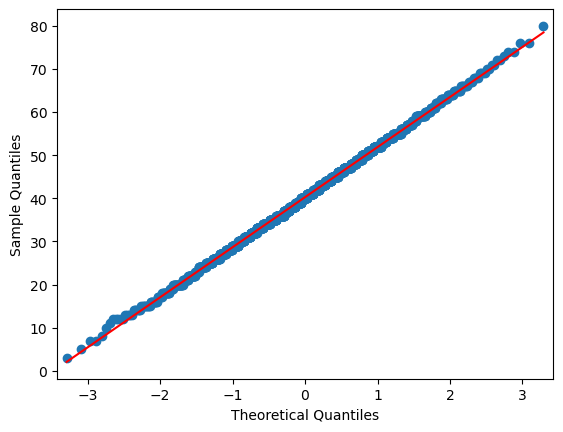

In [58]:
import statsmodels.api as sm
# Mit statsmodels erzeugen wir einen qq Plot unserer Zeit Variable und legen die Normalvertielung (Rotelinie) darüber.
# Zu sehen ist, dass die Variable Zeit approximativ normalverteilt ist.
sm.qqplot(df["Zeit"], line="s")
plt.show()

In [ ]:
#Aufgabe 13 - Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? 
#             Die Kundenabteilung hat vergessen, diese Informatonen zu erfassen. 
#             Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit aufgenommen haben.

In [103]:
#Bezug auf das vorherig erstellte DataFrame das nur Kundendaten enthält
# Mit dr Funktion np.where erzeugen wir in diesem df_kunden eine neue Spalte mit der 
# Bedingung, dass das Einkommen größer als der Preis sein muss. Um Fehler zu vereiden Fragen wir ab ob der Preis > 1 ist.
df_kunden["Kredit"] = np.where((df_kunden["Einkommen"] > df_kunden["Preis"]) & (df_kunden["Preis"] > 1),0,1)
aufgabe_13 = str(df_kunden.Kredit.sum())
print("Es haben " + aufgabe_13 + " Kunden keinen Bankkredit genutzt.")

#Es haben 1099 Kunden keinen Bankkredit genutzt

Es haben 1099 Kunden keinen Bankkredit genutzt
